In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np 

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.set_visible_devices([],'GPU')

### Image Filtering

In [24]:
# import shutil
# def move_images_with_underscore(src_folder, dest_folder):
#     if not os.path.exists(dest_folder):
#         os.makedirs(dest_folder)

#     # Get the list of filenames in the source folder
#     filenames = os.listdir(src_folder)

#     for filename in filenames:
#         src_path = os.path.join(src_folder, filename)

#         # Check if the filename contains an underscore
#         if '_' in filename:
#             dest_path = os.path.join(dest_folder, filename)

#             # Move the file to the img_filtered folder
#             shutil.move(src_path, dest_path)
#             print(f"Moved: {filename}")

# path_to_images_folder = "img_raw"
# img_filtered_folder = "img_filtered"

# move_images_with_underscore(path_to_images_folder, img_filtered_folder)

In [47]:
image_dataset = pd.read_csv('fruitfly_annotationfile.csv')


labels = image_dataset['genus'].unique()
print(labels)
image_dataset.head()

['Austrotephritis' 'Bactrocera' 'Ceratitis' 'Procecidochares' 'Sphenella'
 'Trupanea' 'Urophora']


,file,country,genus,species,fullName,fullName2,fullName3,accesionNumber,view,project
0,NZAC04231968_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231968,wing,B3
1,NZAC04231969_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231969,wing,B3
2,NZAC04231970_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231970,wing,B3
3,NZAC04231972_Austrotephritis_cassiniae_wing_ve...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231972,wing,B3
4,NZAC04231981_Austrotephritis_cassiniae_wing_do...,New Zealand,Austrotephritis,cassiniae,Austrotephritis_cassiniae,Austrotephritis,Austrotephritis,NZAC04231981,wing,B3


In [26]:
import cv2
import imghdr
img_dir = 'img_raw'
img_exts = ['jpeg', 'jpg', 'png', 'bmp']

for wing_image in os.listdir(img_dir):
    img_path = os.path.join(img_dir, wing_image)
    try:
        img =cv2.imread(img_path)
        tip = imghdr.what(img_path)
        # print(tip)
        if tip not in img_exts:
            img = cv2.imread(img_path)
            rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.plot(rgb_img)
            plt.show() 
            print("Image not in extension list {}".format(img_path))
            # os.remove(img_path)
    except Exception as e: 
        print("Issue with image {}".format(img_path))
        # os.remove(img_path)

In [48]:
# import shutil

# filtered_folder = 'img_filtered'
# raw_folder = 'img_raw'
# if not os.path.exists(filtered_folder):
#         os.makedirs(filtered_folder)
# for idxex, row in image_dataset.iterrows():
#         label = row['genus']
#         filename = row['file']
#         source = os.path.join(raw_folder, filename)
#         destination = os.path.join(filtered_folder, label)
#         if not os.path.exists(destination):
#                 os.makedirs(destination)
#         shutil.copy(source, destination)
#         print(f'Moved: {filename} to {destination}')
    
    





Moved: NZAC04231968_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231969_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231970_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231972_Austrotephritis_cassiniae_wing_ventral_rightt.jpg to img_filtered\Austrotephritis
Moved: NZAC04231981_Austrotephritis_cassiniae_wing_dorsal_right.jpg to img_filtered\Austrotephritis
Moved: NZAC04231984_Austrotephritis_cassiniae_wing_dorsal_rightt.jpg to img_filtered\Austrotephritis
Moved: NZAC04231985_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231987_Austrotephritis_cassiniae_wing_dorsal_right.jpg to img_filtered\Austrotephritis
Moved: NZAC04231992_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Moved: NZAC04231993_Austrotephritis_cassiniae_wing_dorsal_left.jpg to img_filtered\Austrotephritis
Mov

In [74]:
# tf.keras.utils.image_dataset_from_directory??

In [2]:
import keras

data = tf.keras.utils.image_dataset_from_directory('img_filtered')
data_iterator = data.as_numpy_iterator()

Found 870 files belonging to 7 classes.


In [5]:
batch = data_iterator.next()

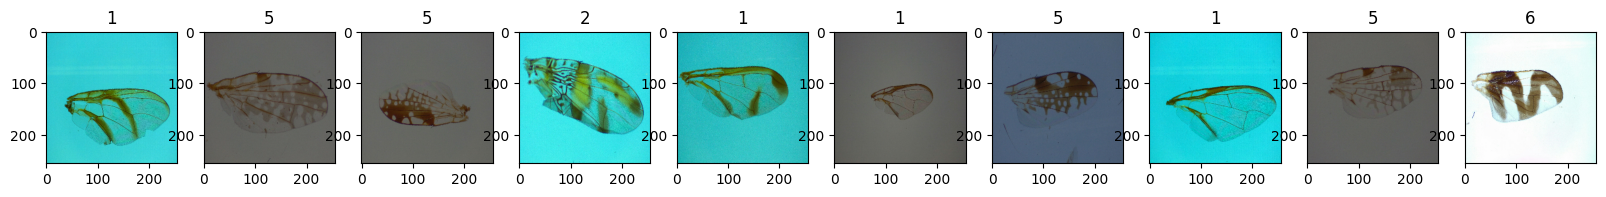

In [6]:
fig, ax= plt.subplots(ncols = 10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

wing_labels = {0:'Austrotephritis' ,1:'Bactrocera',2:'Ceratitis', 3:'Procecidochares', 4:'Sphenella', 5:'Trupanea',6:'Urophora' }

# Preprocessing Data

### Scaling Pixel values


In [3]:
data = data.map(lambda x,y : (x/255,y))
data = data.map(lambda x, y: (x, tf.one_hot(y, depth=7)))


In [4]:
filtered_pipeline = data.as_numpy_iterator().next()

### Splitting data

In [4]:
train_size = int(len(data) * 0.7) #19
val_size = int(len(data) * 0.2)  + 1# 5 + 1
test_size = int(len(data) * 0.1) + 1 #2 + 1

In [6]:
#check if we are using all the data
len(data) ==train_size + val_size + test_size 

True

In [5]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Model creation

### Building deep learning model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [140]:
# model = Sequential()

In [141]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# # model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(7, activation='softmax')) 

In [142]:
# model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


num_classes = 7

model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

# Training the Model

In [14]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [8]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Physical devices cannot be modified after being initialized


In [9]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [11]:
%%time
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
19/19 [==============================] - 3s 128ms/step - loss: 0.1109 - accuracy: 0.9655 - val_loss: 0.1042 - val_accuracy: 0.9583
Epoch 2/20
19/19 [==============================] - 3s 131ms/step - loss: 0.0937 - accuracy: 0.9688 - val_loss: 0.0753 - val_accuracy: 0.9740
Epoch 3/20
19/19 [==============================] - 3s 132ms/step - loss: 0.0709 - accuracy: 0.9770 - val_loss: 0.0775 - val_accuracy: 0.9792
Epoch 4/20
19/19 [==============================] - 3s 137ms/step - loss: 0.0705 - accuracy: 0.9753 - val_loss: 0.2509 - val_accuracy: 0.9167
Epoch 5/20
19/19 [==============================] - 3s 132ms/step - loss: 0.1611 - accuracy: 0.9490 - val_loss: 0.0815 - val_accuracy: 0.9740
Epoch 6/20
19/19 [==============================] - 3s 128ms/step - loss: 0.0889 - accuracy: 0.9737 - val_loss: 0.0426 - val_accuracy: 0.9896
Epoch 7/20
19/19 [==============================] - 3s 133ms/step - loss: 0.0609 - accuracy: 0.9803 - val_loss: 0.0608 - val_accuracy: 0.9896
Epoch 

### Plot Performance

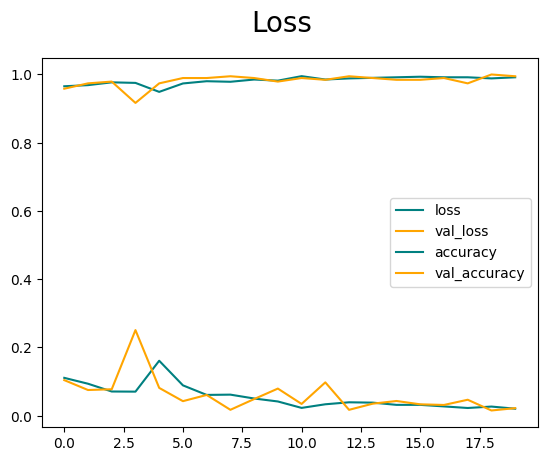

In [18]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='center right')
plt.show()

# Testing the model

In [20]:
from tensorflow.keras.metrics import Precision, Recall,CategoricalAccuracy 
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    pred = model.predict(X)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()
print("Precision: {:.4f}, Recall: {:.4f}, Accuracy: {:.4f}".format(precision, recall, accuracy))

1/1 [==============================] - 0s 13ms/step
Precision: 0.9904, Recall: 0.9810, Accuracy: 0.9905
